# Vigenere algorithm

- Creating a histogram of the frequency of letters in the text.

- Implementation of the Wigener encryption algorithm.

- Conducting a cryptanalysis of the Vigenère cipher and decrypt ciphertext.

## 1. Preparation

In [1]:
ALPHABET = "абвгґдеєжзиіїйклмнопрстуфхцчшщьюя"

In [2]:
def get_vigenere_table(alphabet, ROT=0):
    table = []
    for i in range(len(alphabet)):
        row = []
        for j in range(len(alphabet)):
            row.append(alphabet[(i + j + ROT) % len(alphabet)])
        table.append(row)
    return table

In [3]:
table = get_vigenere_table(ALPHABET)

In [4]:
for row in table:
    print(' '.join(row))

а б в г ґ д е є ж з и і ї й к л м н о п р с т у ф х ц ч ш щ ь ю я
б в г ґ д е є ж з и і ї й к л м н о п р с т у ф х ц ч ш щ ь ю я а
в г ґ д е є ж з и і ї й к л м н о п р с т у ф х ц ч ш щ ь ю я а б
г ґ д е є ж з и і ї й к л м н о п р с т у ф х ц ч ш щ ь ю я а б в
ґ д е є ж з и і ї й к л м н о п р с т у ф х ц ч ш щ ь ю я а б в г
д е є ж з и і ї й к л м н о п р с т у ф х ц ч ш щ ь ю я а б в г ґ
е є ж з и і ї й к л м н о п р с т у ф х ц ч ш щ ь ю я а б в г ґ д
є ж з и і ї й к л м н о п р с т у ф х ц ч ш щ ь ю я а б в г ґ д е
ж з и і ї й к л м н о п р с т у ф х ц ч ш щ ь ю я а б в г ґ д е є
з и і ї й к л м н о п р с т у ф х ц ч ш щ ь ю я а б в г ґ д е є ж
и і ї й к л м н о п р с т у ф х ц ч ш щ ь ю я а б в г ґ д е є ж з
і ї й к л м н о п р с т у ф х ц ч ш щ ь ю я а б в г ґ д е є ж з и
ї й к л м н о п р с т у ф х ц ч ш щ ь ю я а б в г ґ д е є ж з и і
й к л м н о п р с т у ф х ц ч ш щ ь ю я а б в г ґ д е є ж з и і ї
к л м н о п р с т у ф х ц ч ш щ ь ю я а б в г ґ д е є ж з и і ї й
л м н о п 

In [5]:
# prepare an index dictionary
def get_alphabet_dictionary(alphabet):
    return dict(zip(list(alphabet), range(len(alphabet))))

In [6]:
dictionary = get_alphabet_dictionary(ALPHABET)

In [7]:
for i, char in enumerate(ALPHABET):
    if not ((i + 1) % 11):
        print("{} - {}.\n".format(char, dictionary[char]), end='')
    else:
        print("{} - {},\t".format(char, dictionary[char]), end='')

а - 0,	б - 1,	в - 2,	г - 3,	ґ - 4,	д - 5,	е - 6,	є - 7,	ж - 8,	з - 9,	и - 10.
і - 11,	ї - 12,	й - 13,	к - 14,	л - 15,	м - 16,	н - 17,	о - 18,	п - 19,	р - 20,	с - 21.
т - 22,	у - 23,	ф - 24,	х - 25,	ц - 26,	ч - 27,	ш - 28,	щ - 29,	ь - 30,	ю - 31,	я - 32.


**Obviously, both table and dictionary not much needed and we can easily work without them, but that way, in my opinion, it looks more clearly**

## 2. Frequencies histogram

In [8]:
filename = "encrypted2.txt"
with open(filename, 'r') as file:
    data = file.readline()

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
histogram = np.unique(list(data), return_counts=True)

letters = histogram[0]
freq = histogram[1] / sum(histogram[1])

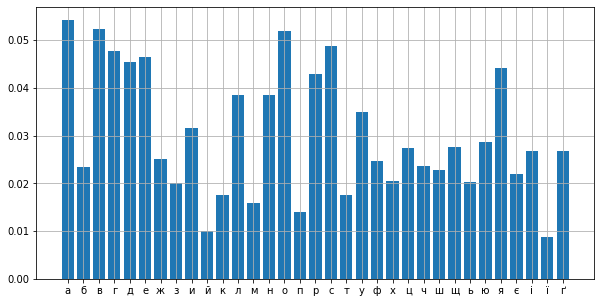

In [11]:
fig, axis = plt.subplots(1, 1, figsize=(10, 5))

axis.bar(np.arange(len(freq)), freq, tick_label=letters)
axis.grid()

## 3. Vigenere cipher, encryption with key

In [12]:
from string import ascii_lowercase

In [13]:
def encryption(plaintext, keyword, alphabet = ascii_lowercase, ROT=0):
    plaintext = plaintext.lower()
    
    table = get_vigenere_table(alphabet, ROT)
    dictionary = get_alphabet_dictionary(alphabet)
    
    ciphertext = []
    counter = 0
    for i in range(len(plaintext)):
        pChar = plaintext[i]
        kChar = keyword[counter % len(keyword)]
        
        if not pChar.isalpha():
            #ciphertext.append(pChar)
            continue
        else:
            counter += 1
        
        rowIndex = dictionary[pChar]
        colIndex = dictionary[kChar]
        
        ciphertext.append(table[rowIndex][colIndex])
    return ''.join(ciphertext)

In [14]:
# wiki example
encryption("The quick brown fox jumps over lazy dogs.", "vigenere")

'opkuhmtowzuaajfbecstfsmimtgdlhfkn'

https://cryptii.com/pipes/vigenere-cipher - correct.

## 4. Cryptanalysis

In [15]:
filename = "encrypted2.txt"
with open(filename, 'r') as file:
    data = np.array(list(file.readline()))

In [16]:
# custom test

# data = """vptnvffuntshtarptymjwzirappljmhhqvsubwlzzygvtyitarptyiougxiuydtgzhhvvmum
# shwkzgstfmekvmpkswdgbilvjljmglmjfqwioiivknulvvfemioiemojtywdsajtwmtcgluy
# sdsumfbieugmvalvxkjduetukatymvkqzhvqvgvptytjwwldyeevquhlulwpkt
# """
# data = np.array(list(data.replace('\n', '')))

### 4.1 Find a key length

In [17]:
keyLength = np.arange(5, 21)

In [18]:
def get_coincidence_index(seq):
    counts = np.unique(list(seq), return_counts=True)[1]
    N = sum(counts)
    
    index = sum([(fi * (fi - 1)) for fi in counts]) / (N * (N - 1))
    return index

In [19]:
coincidenceIndexes = []

for key in keyLength:
    key_index = 0
    for i in range(key):
        seq = data[i::key]
        key_index += get_coincidence_index(seq)
    coincidenceIndexes.append(key_index / key)

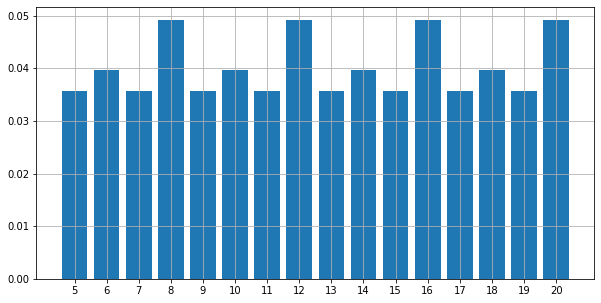

In [20]:
fig, axis = plt.subplots(1, 1, figsize=(10, 5))

axis.bar(np.arange(len(coincidenceIndexes)), coincidenceIndexes, tick_label=keyLength)
axis.grid()

In [21]:
# So, our key probably multiples of four

### 4.2 Try to find a key

In [22]:
ENGLISH = {
    'e' :  0.1202, 't' :  0.091, 'a' :  0.0812, 'o' :  0.0768, 'i' :  0.0731,
    'n' :  0.0695, 's' :  0.0628, 'r' :  0.0602, 'h' :  0.0592, 'd' :  0.0432,
    'l' :  0.0398, 'u' :  0.0288, 'c' :  0.0271, 'm' :  0.0261, 'f' :  0.023, 
    'y' :  0.0211, 'w' :  0.0209, 'g' :  0.0203, 'p' :  0.0182, 'b' :  0.0149,
    'v' :  0.0111, 'k' :  0.0069, 'x' :  0.0017, 'q' :  0.0011, 'j' :  0.001,
    'z' :  0.0007
}

In [23]:
UKRANIAN = {
    'а' : 0.0834, 'б' : 0.0153, 'в' : 0.055, 'г' : 0.0159, 
    'ґ' : 0.0001, 'д' : 0.0306, 'е' : 0.0459, 'є' : 0.0039, 
    'ж' : 0.0071, 'з' : 0.021, 'и' : 0.06, 'й' : 0.0124, 
    'і' : 0.0623, 'ї' : 0.0084, 'к' : 0.04, 'л' : 0.0393, 
    'м' : 0.0302, 'н' : 0.071, 'о' : 0.0928, 'п' : 0.0284, 
    'р' : 0.0548, 'с' : 0.0457, 'т' : 0.0477, 'у' : 0.0338, 
    'ф' : 0.0035, 'х' : 0.0117, 'ц' : 0.0102, 'ч' : 0.0115, 
    'ш' : 0.0071, 'щ' : 0.0032, 'ь' : 0.0183, 'ю' : 0.007, 
    'я' : 0.0216
}

In [41]:
period = 8

In [42]:
def get_chi(seq, table):
    coefficient = 0
    for char in table.keys():
        expected = len(seq) * table[char]
        current = np.count_nonzero(seq == char)
        
        coefficient += (expected - current) ** 2 / expected
    
    return coefficient

In [59]:
def backward_caesar(seq, shift, alphabet):
    letters = np.unique(seq)
    result = np.copy(seq)
    for letter in letters:
        oldIndex = alphabet.index(letter)
        newIndex = (oldIndex - shift + len(alphabet)) % len(alphabet)

        result[seq == letter] = alphabet[newIndex]
    return result

In [60]:
print(ascii_lowercase)

abcdefghijklmnopqrstuvwxyz


In [92]:
ALPHABET = "абвгґдеєжзиіїйклмнопрстуфхцчшщьюя"

filename = "encrypted2.txt"
with open(filename, 'r') as file:
    data = np.array(list(file.readline()))
    
    
period = 8
for keyChar in range(period):
    minChi, keyIndex = 9999, -1
    for shift in range(len(UKRANIAN)):
        seq = data[keyChar::period]
        seq = backward_caesar(seq, shift, alphabet = ALPHABET)
        currentChi = get_chi(seq, table = UKRANIAN)

        if (currentChi < minChi):
            minChi, keyIndex = currentChi, shift
    print(ALPHABET[keyIndex], minChi)

с 4562.83724533604
а 4133.54104021048
л 4376.908142247158
о 5202.636822080401
с 5410.74249393708
а 4468.449038338094
л 4585.724126552579
о 5318.591919300849


In [93]:
def decryption(ciphertext, keyword, alphabet = ascii_lowercase, ROT=0):
    ciphertext = ciphertext.lower()
    
    table = get_vigenere_table(alphabet, ROT)
    dictionary = get_alphabet_dictionary(alphabet)
    
    counter = 0
    for i in range(len(ciphertext)):
        cChar = ciphertext[i]
        kChar = keyword[counter % len(keyword)]
        
        if not cChar.isalpha():
            continue
        else:
            counter += 1
            
        cipherIndex = alphabet.index(cChar)
        keyIndex = alphabet.index(kChar)
        
        print(alphabet[(cipherIndex - keyIndex + len(alphabet)) % len(alphabet)], end='')
        if not (counter % 80):
            print()
        elif (counter > 500):
            return

In [94]:
filename = "encrypted2.txt"
with open(filename, 'r') as file:
    data = file.readline()

In [95]:
decryption(data, 'сало', "абвгґдеєжзиіїйклмнопрстуфхцчшщьюя")

хлопчикщовиживмістерімісісдурсліщожиливбудинкуномерчотиринавуличціпрівітдрайвпиш
алисятимщобулиславабогуабсолютнонормальнимикогокогоалетількинеїхможнабулобзапідо
зритищовониповязанізтаємницямичидивамиботакимидурницямивонинецікавилисямістердур
слікерувавфірмоюґраннінґсякавиготовляласвердлатобувтакийдебелийчоловягащоздаєтьс
яйшиїнемавзатейогообличчяприкрашалипишнівусанатомістьмісісдурслібулахудорлявабіл
явааїїшиябуламайжевдвічідовшаніжузвичайнихлюдейіцеставалоїйувеликійпригодінадтов
жевонаполюблялазазира

so, it's Harry Potter text